In [1]:
from datetime import datetime
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cartopy import crs, feature

from biopy import md, utils

%load_ext watermark
%watermark -i -v -p biopy

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.22.0

biopy: 0.8.6.dev2



In [2]:
savoir_export = 'Export_INT_GC1_MC2_RC3_S3_Full_AOI_DTID_GUANN_DEBUG.xlsx'

df = pd.read_excel(savoir_export)
if 'Unnamed: 0' in df:
    df.drop(columns='Unnamed: 0', inplace=True)
    
df['delta_Anx'] = df['Anx'].diff().apply(lambda t: t.total_seconds())

columns = ['Start', 'End', 'Duration', 'Orbit', 'Anx', 'TAnx', 'delta_Anx']

df[columns].head(10)

,Start,End,Duration,Orbit,Anx,TAnx,delta_Anx
0,2017-03-02 06:07:23.674,2017-03-02 06:09:37.671,133.997563,881,2017-03-02 06:05:51.514,92.159922,NaN
1,2017-03-02 06:58:33.629,2017-03-02 06:59:05.629,32.000000,881,2017-03-02 06:05:51.514,3162.114738,0.000
2,2017-03-02 07:00:13.784,2017-03-02 07:00:45.784,32.000000,881,2017-03-02 06:05:51.514,3262.270477,0.000
3,2017-03-02 07:12:37.221,2017-03-02 07:26:17.822,820.601003,881,2017-03-02 06:05:51.514,4005.707256,0.000
4,2017-03-02 08:33:54.289,2017-03-02 08:42:30.585,516.295486,882,2017-03-02 07:44:02.496,2991.793146,5890.982
5,2017-03-02 08:50:48.386,2017-03-02 09:03:54.986,786.600363,882,2017-03-02 07:44:02.496,4005.889606,0.000
6,2017-03-02 09:14:49.206,2017-03-02 09:24:04.133,554.926082,882,2017-03-02 07:44:02.496,5446.710479,0.000
7,2017-03-02 09:52:31.728,2017-03-02 09:54:50.577,138.848744,883,2017-03-02 09:22:13.477,1818.251071,5890.981
8,2017-03-02 09:55:59.171,2017-03-02 09:59:11.402,192.231712,883,2017-03-02 09:22:13.477,2025.693641,0.000
9,2017-03-02 10:07:06.702,2017-03-02 10:09:14.762,128.059517,883,2017-03-02 09:22:13.477,2693.225046,0.000


In [4]:
df.loc[6:7][['Orbit', 'Anx']]

,Orbit,Anx
6,882,2017-03-02 07:44:02.496
7,883,2017-03-02 09:22:13.477


In [38]:
data_take_start = df['Start'][6]
data_take_stop = df['End'][6]
anx = df['Anx'][6]
anx, data_take_start, data_take_stop

(Timestamp('2017-03-02 07:44:02.496000'),
 Timestamp('2017-03-02 09:14:49.206000'),
 Timestamp('2017-03-02 09:24:04.133000'))

In [58]:
# slice grid
sg = utils.Grid(utils.SLICE_DURATION, utils.NUM_SLICES, utils.SLICE_INITIAL_OVERLAP, utils.SLICE_FINAL_OVERLAP)

# get first slice
for n in range(utils.NUM_SLICES):
    i = sg.interval(n + 1)
    o = i.overlap(
        utils.Interval(
            (data_take_start - anx).total_seconds(),
            (data_take_stop - anx).total_seconds()
        )
    )
    if o is not None:
        slice_number = n + 1
        theoretic_slice_start = anx + pd.to_timedelta(i.left, unit='s')
        theoretic_slice_stop = anx + pd.to_timedelta(i.right, unit='s')
        slice_start = anx + pd.to_timedelta(o.left, unit='s')
        slice_stop = anx + pd.to_timedelta(o.right, unit='s')
        break
        
# get first slice for platform ancillary data
for n in range(utils.NUM_SLICES):
    i = sg.interval(n + 1)
    o = i.overlap(
        utils.Interval(
            (data_take_start - anx).total_seconds() - utils.PLATFORM_ANCILLARY_INITIAL_MARGIN,
            (data_take_stop - anx).total_seconds() - utils.PLATFORM_ANCILLARY_FINAL_MARGIN 
        )
    )
    if o is not None:
        plt_slice_number = n + 1
        theoretic_slice_start = anx + pd.to_timedelta(i.left, unit='s')
        theoretic_slice_stop = anx + pd.to_timedelta(i.right, unit='s')
        plt_slice_start = anx + pd.to_timedelta(o.left, unit='s')
        plt_slice_stop = anx + pd.to_timedelta(o.right, unit='s')
        break


In [59]:
slice_number, (slice_start, slice_stop), (slice_stop - slice_start).total_seconds()

(58,
 (Timestamp('2017-03-02 09:14:49.206000'),
  Timestamp('2017-03-02 09:16:00.412848920')),
 71.206848)

In [60]:
plt_slice_number, (plt_slice_start, plt_slice_stop), (plt_slice_stop - plt_slice_start).total_seconds()

(58,
 (Timestamp('2017-03-02 09:14:33.206000'),
  Timestamp('2017-03-02 09:16:00.412848920')),
 87.206848)

In [63]:
# frame grid
fg = utils.Grid(utils.FRAME_DURATION, utils.NUM_FRAMES, utils.FRAME_INITIAL_OVERLAP, utils.FRAME_FINAL_OVERLAP)

# get first frame
for n in range(utils.NUM_FRAMES):
    i = fg.interval(n + 1)
    o = i.overlap(
        utils.Interval(
            (data_take_start - anx).total_seconds(),
            (data_take_stop - anx).total_seconds()
        )
    )
    if o is not None:
        frame_number = n + 1
        theoretic_frame_start = anx + pd.to_timedelta(i.left, unit='s')
        theoretic_frame_stop = anx + pd.to_timedelta(i.right, unit='s')
        frame_start = anx + pd.to_timedelta(o.left, unit='s')
        frame_stop = anx + pd.to_timedelta(o.right, unit='s')
        break

frame_number, (frame_start, frame_stop), (frame_stop - frame_start).total_seconds()

(287,
 (Timestamp('2017-03-02 09:14:49.206000'),
  Timestamp('2017-03-02 09:14:58.403364276')),
 9.197364)

In [64]:
mission_phase = 'INT'
global_coverage_id = df['GCID'][6]
major_cycle_id = df['MCID'][6]
repeat_cycle_id = df['RCID'][6]
swath_id = 3
acquisition_date = data_take_stop + pd.to_timedelta(30, unit='m')
track_number = df['Track'][6]
data_takes = [int(df['DataTake_ID'][6], 2)]

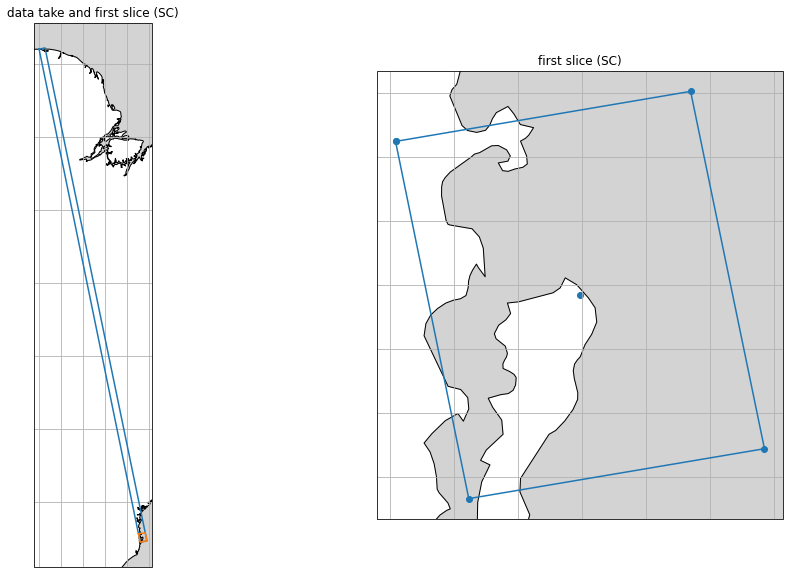

In [74]:
dt_nw_lat = df['NW_Lat'][6]
dt_ne_lat = df['NE_Lat'][6]
dt_sw_lat = df['SW_Lat'][6]
dt_se_lat = df['SE_Lat'][6]

dt_nw_lon = df['NW_Lon'][6]
dt_ne_lon = df['NE_Lon'][6]
dt_sw_lon = df['SW_Lon'][6]
dt_se_lon = df['SE_Lon'][6]

delta_lat_e = dt_ne_lat - dt_se_lat
delta_lon_e = dt_se_lon - dt_ne_lon
delta_lat_w = dt_nw_lat - dt_sw_lat
delta_lon_w = dt_sw_lon - dt_nw_lon

dt_duration = df['Duration'][6]

r_delta_lat_e = delta_lat_e / dt_duration
r_delta_lon_e = delta_lon_e / dt_duration
r_delta_lat_w = delta_lat_w / dt_duration
r_delta_lon_w = delta_lon_w / dt_duration

frame_duration = (frame_stop - frame_start).total_seconds()

f_nw_lon = dt_sw_lon - r_delta_lon_w * frame_duration
f_ne_lon = dt_se_lon - r_delta_lon_e * frame_duration
f_se_lon = dt_se_lon
f_sw_lon = dt_sw_lon

f_nw_lat = dt_sw_lat + r_delta_lat_w * frame_duration
f_ne_lat = dt_se_lat + r_delta_lat_e * frame_duration
f_se_lat = dt_se_lat
f_sw_lat = dt_sw_lat

d_lon_1 = f_ne_lon - f_sw_lon
d_lon_2 = f_se_lon - f_nw_lon
d_lat_1 = f_ne_lat - f_sw_lat
d_lat_2 = f_se_lat - f_nw_lat

a = np.array([[1 / d_lon_1, -1 / d_lat_1], [1 / d_lon_2, -1 / d_lat_2]])
b = np.array([f_sw_lon / d_lon_1 - f_sw_lat / d_lat_1, f_nw_lon / d_lon_2 - f_nw_lat / d_lat_2])
c = np.linalg.solve(a, b)

lon = [dt_nw_lon, dt_ne_lon, dt_se_lon, dt_sw_lon, dt_nw_lon]
lat = [dt_nw_lat, dt_ne_lat, dt_se_lat, dt_sw_lat, dt_nw_lat]

lonf = [f_nw_lon, f_ne_lon, f_se_lon, f_sw_lon, f_nw_lon]
latf = [f_nw_lat, f_ne_lat, f_se_lat, f_sw_lat, f_nw_lat]

fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot2grid((1, 2), (0, 0), projection=crs.PlateCarree())
ax1.coastlines()
ax1.add_feature(feature.OCEAN, facecolor='lightgrey')
ax1.gridlines()
ax1.plot(lon, lat, marker=None, linestyle='-', transform=crs.PlateCarree())
ax1.plot(lonf, latf, marker=None, linestyle='-', transform=crs.PlateCarree())

plt.title('data take and first slice (SC)')

ax2 = plt.subplot2grid((1, 2), (0, 1), projection=crs.PlateCarree())
ax2.coastlines()
ax2.add_feature(feature.OCEAN, facecolor='lightgrey')
ax2.gridlines()
ax2.plot(lonf, latf, marker='o', linestyle='-', transform=crs.PlateCarree())
ax2.scatter([c[0]], [c[1]], transform=crs.PlateCarree())

plt.title('first slice (SC)')

plt.show()

In [83]:
raw_022_10 = {
    'file_type': 'RAW_022_10',
    'validity_start': data_take_start - pd.to_timedelta(PLATFORM_ANCILLARY_INITIAL_MARGIN, unit='s'),
    'validity_stop': data_take_stop + pd.to_timedelta(PLATFORM_ANCILLARY_FINAL_MARGIN, unit='s'),
    'acquisition_center': 'SGS',
    'acquisition_date': acquisition_date,
    'creation_date': acquisition_date + pd.to_timedelta(5, unit='m'),
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'SGS',
    'processor_name': 'PDGS-AF',
    'processor_version': '1.0',
    'track_number': track_number,
    'mission_phase': mission_phase,
    'global_coverage_id': global_coverage_id,
    'major_cycle_id': major_cycle_id,
    'repeat_cycle_id': repeat_cycle_id,
}

raw_025_10 = {
    'file_type': 'RAW_025_10',
    'validity_start': data_take_start,
    'validity_stop': data_take_stop,
    'acquisition_center': 'SGS',
    'acquisition_date': acquisition_date,
    'creation_date': acquisition_date + pd.to_timedelta(5, unit='m'),
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'SGS',
    'processor_name': 'PDGS-AF',
    'processor_version': '1.0',
    'track_number': track_number,
    'mission_phase': mission_phase,
    'global_coverage_id': global_coverage_id,
    'major_cycle_id': major_cycle_id,
    'repeat_cycle_id': repeat_cycle_id,
}

raws022_10 = raw_022_10.copy()
raws022_10.update(
    file_type='RAWS022_10',
    validity_start=plt_slice_start,
    validity_stop=plt_slice_stop,
    slice_number=plt_slice_num,
    slice_start=plt_slice_start,
    slice_stop=plt_slice_stop,
    creation_date=raw_022_10['creation_date'] + pd.to_timedelta(15, unit='m'),
    processing_center='ESR',
    processor_name='L0PF',
    processor_version='01.00'
)

raws025_10 = raw_025_10.copy()
raws025_10.update(
    file_type='RAWS025_10',
    validity_start=slice_start,
    validity_stop=slice_stop,
    slice_number=slice_num,
    slice_start=slice_start,
    slice_stop=slice_stop,
    creation_date=raw_025_10['creation_date'] + pd.to_timedelta(15, unit='m'),
    processing_center='ESR',
    processor_name='L0PF',
    processor_version='01.00'
)

s3_raw__0s = {
    'file_type': 'S3_RAW__0S',
    'validity_start': slice_start,
    'validity_stop': slice_stop,
    'slice_number': slice_num,
    'slice_start': slice_start,
    'slice_stop': slice_stop,
    'creation_date': acquisition_date + pd.to_timedelta(10, unit='m'),
    'data_takes': data_takes,
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'ESR',
    'processor_name': 'L0PF',
    'processor_version': '01.00',
    'track_number': track_number,
    'mission_phase': mission_phase,
    'global_coverage_id': global_coverage_id,
    'major_cycle_id': major_cycle_id,
    'repeat_cycle_id': repeat_cycle_id,
    'swath_id': swath_id,
}

s3_raw__0m = {
    'file_type': 'S3_RAW__0M',
    'validity_start': data_take_start,
    'validity_stop': data_take_stop,
    'creation_date': acquisition_date + pd.to_timedelta(15, unit='m'),
    'data_takes': data_takes,
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'ESR',
    'processor_name': 'L0PF',
    'processor_version': '01.00',
    'track_number': track_number,
    'mission_phase': mission_phase,
    'global_coverage_id': global_coverage_id,
    'major_cycle_id': major_cycle_id,
    'repeat_cycle_id': repeat_cycle_id,
    'swath_id': swath_id,
}

ac_raw__0a = {
    'file_type': 'AC_RAW__0A',
    'validity_start': data_take_start - pd.to_timedelta(PLATFORM_ANCILLARY_INITIAL_MARGIN),
    'validity_stop': data_take_stop + pd.to_timedelta(PLATFORM_ANCILLARY_FINAL_MARGIN),
    'creation_date': acquisition_date + pd.to_timedelta(15, unit='m'),
    'data_takes': data_takes,
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'ESR',
    'processor_name': 'L0PF',
    'processor_version': '01.00',
    'track_number': track_number,
    'mission_phase': mission_phase,
    'global_coverage_id': global_coverage_id,
    'major_cycle_id': major_cycle_id,
    'repeat_cycle_id': repeat_cycle_id,
}

aux_att___ = {
    'file_type': 'AUX_ATT___',
    'validity_start': data_take_start - pd.to_timedelta(PLATFORM_ANCILLARY_INITIAL_MARGIN),
    'validity_stop': data_take_stop + pd.to_timedelta(PLATFORM_ANCILLARY_FINAL_MARGIN),
    'creation_date': acquisition_date + pd.to_timedelta(15, unit='m'),
    'data_takes': data_takes,
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'ESR',
    'processor_name': 'L0PF',
    'processor_version': '01.00'
}

aux_orb___ = {
    'file_type': 'AUX_ORB___',
    'validity_start': data_take_start - pd.to_timedelta(PLATFORM_ANCILLARY_INITIAL_MARGIN),
    'validity_stop': data_take_stop + pd.to_timedelta(PLATFORM_ANCILLARY_FINAL_MARGIN),
    'creation_date': acquisition_date + pd.to_timedelta(15, unit='m'),
    'data_takes': data_takes,
    'processing_center': 'ESR',
    'processor_name': 'L0PF',
    'processor_version': '01.00'
}

s3_scs__1s = {
    'file_type': 'S3_SCS__1S',
    'validity_start': frame_start,
    'validity_stop': frame_stop,
    'frame_number': frame_num,
    'frame_start': frame_start,
    'frame_stop': frame_stop,
    'creation_date': acquisition_date + pd.to_timedelta(25, unit='m'),
    'data_takes': data_takes,
    'orbit_start': df['Orbit'][6],
    'orbit_stop': df['Orbit'][7],
    'processing_center': 'ESR',
    'processor_name': 'BPS',
    'processor_version': '01.00',
    'track_number': track_number,
    'mission_phase': mission_phase,
    'global_coverage_id': global_coverage_id,
    'major_cycle_id': major_cycle_id,
    'repeat_cycle_id': repeat_cycle_id,
    'swath_id': swath_id,
}

aux_erp___ = {
    'file_type': 'AUX_ERP___',
    'validity_start': pd.Timestamp('2017-01-02'),
    'validity_stop': pd.Timestamp('2017-03-01'),
    'creation_date': pd.Timestamp('2017-03-01'),
    'processing_center': 'ESR',
    'processor_name': 'biopy',
    'processor_version': '01.00'
}

aux_gmf___ = {
    'file_type': 'AUX_GMF___',
    'validity_start': pd.Timestamp('1900-01-01'),
    'validity_stop': pd.Timestamp('2025-01-01'),
    'creation_date': pd.Timestamp('2019-12-19'),
    'processing_center': 'ESR',
    'processor_name': 'biopy',
    'processor_version': '01.00'
}


products = [raw_022_10, raw_025_10, raws022_10, raws025_10, s3_raw__0s, s3_raw__0m,
            ac_raw__0a, aux_att___, aux_orb___, s3_scs__1s, aux_erp___, aux_gmf___]
for n in range(len(products)):
    products[n]['file_type'] = md.FileType(products[n]['file_type'])
    products[n]['tai_utc'] = 0.6
    if 'mission_phase' in products[n]:
        products[n]['mission_phase'] = md.MissionPhase[products[n]['mission_phase']]
    if 'global_coverage_id' in products[n]:
        products[n]['global_coverage_id'] = md.GlobalCoverage(products[n]['global_coverage_id'])
    if 'major_cycle_id' in products[n]:
        products[n]['major_cycle_id'] = md.MajorCycle(products[n]['major_cycle_id'])
    if 'repeat_cycle_id' in products[n]:
        products[n]['repeat_cycle_id'] = md.RepeatCycle(products[n]['repeat_cycle_id'])
    if 'swath_id' in products[n]:
        products[n]['swath_id'] = md.Swath(products[n]['swath_id'])
    for k in products[n]:
        if isinstance(products[n][k], pd.Timestamp):
            products[n][k] = products[n][k].to_numpy().astype('datetime64[us]').astype(datetime)
products = [md.Metadata(**p) for p in products]
for n in range(len(products)):
    products[n].product_level = products[n].file_type.level()
    products[n].baseline = md.Baseline(1)
    products[n].file_name = products[n].default_name()
    if products[n].product_level >= md.ProductLevel.L0:
        products[n].orbit_direction = md.OrbitDirection[df['Pass'][6]]
    if products[n].product_level == md.ProductLevel.L1:
        qlname = "./preview/%s_ql.png" % products[n].file_name.lower()[:-10]
        products[n].quicklook = md.QuickLook(qlname, 'EPSG:4326')
        products[n].footprint_center = (c[1], c[0])
        products[n].footprint_polygon = [(f_nw_lat, f_nw_lon), (f_ne_lat, f_ne_lon),
                                         (f_se_lat, f_se_lon), (f_sw_lat, f_sw_lon), (f_nw_lat, f_nw_lon)]

In [84]:
data_take_start, data_take_stop

(Timestamp('2017-03-02 09:14:49.206000'),
 Timestamp('2017-03-02 09:24:04.133000'))

In [94]:
result = [vars(p) for p in products if str(p.file_type) == 'AC_RAW__0A'][0]
{k: v for k, v in result.items() if v is not None}

{'file_type': FileType(AC_RAW__0A),
 'validity_start': datetime.datetime(2017, 3, 2, 9, 14, 49, 205999),
 'validity_stop': datetime.datetime(2017, 3, 2, 9, 24, 4, 133000),
 'auxiliary_files': [],
 'baseline': Baseline(1),
 'creation_date': datetime.datetime(2017, 3, 2, 10, 9, 4, 133000),
 'data_takes': [7230790],
 'epoch': datetime.datetime(2000, 1, 1, 0, 0, tzinfo=datetime.timezone.utc),
 'file_class': <FileClass.OPER: 0>,
 'file_name': 'BIO_AC_RAW__0A_20170302T091449_20170302T092404_I_G01_M02_C03_T002_F____01_8YJW74',
 'global_coverage_id': <GlobalCoverage.GC1: 1>,
 'internal_files': [],
 'major_cycle_id': <MajorCycle.MC2: 2>,
 'mission_phase': <MissionPhase.INT: 2>,
 'orbit_direction': <OrbitDirection.ASCENDING: 0>,
 'orbit_start': 882,
 'orbit_stop': 883,
 'processing_center': 'ESR',
 'processor_name': 'L0PF',
 'processor_version': '01.00',
 'product_level': <ProductLevel.L0: 0>,
 'repeat_cycle_id': <RepeatCycle.RC3: 3>,
 'tai_utc': 0.6,
 'source_products': [],
 'track_number': 2}

In [88]:
df['Anx'][7]

Timestamp('2017-03-02 09:22:13.477000')